In [11]:
!mkdir -p /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/logFC

In [38]:
import glob
import re
import pandas as pd

def get_files(directory, factor):
    return [f for f in glob.glob(directory + '/' + '*' + '.with_genes.sig_DE.txt') if f.startswith(directory + '/' + factor)]


def clean_columns(f):
    return '.'.join(f.split('/')[-1].split('_')[:1])

factor_files = {
    'mmTreg': get_files('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual', 'mmTreg'),
    'Th17': get_files('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual', 'Th17'),
    'Th1': get_files('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual', 'Th1'),
    'Th2': get_files('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual', 'Th2')
}


for fact, file in factor_files.items():
    df=None
    for f in file:
        df_tmp = pd.read_csv(f, sep = '\t')
        df_tmp.drop(columns = ['Unnamed: 0', 'baseMean', 'lfcSE', 'pvalue', 'padj', 'GeneType'], inplace = True)
        df_tmp = df_tmp[['GeneName', 'log2FoldChange']]
        df_tmp.columns = df_tmp.columns[:-1].tolist() + [clean_columns(f)]
        if df is None:
            df = df_tmp
        else:
            df = df.merge(df_tmp, how = 'inner', on = 'GeneName')
               
    df = df[['GeneName','%s.Bulk.00hr'%fact,'%s.Bulk.02hr'%fact,'%s.Bulk.16hr'%fact,'%s.Bulk.24hr'%fact,'%s.Bulk.48hr'%fact,'%s.Sorted.72hr'%fact]]
    df.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/logFC/%s.inner.logFC.txt' % fact, sep='\t', index=False)  


### hierarchical clustering heatmaps for Th1 using genes that are expressed in all timepoints

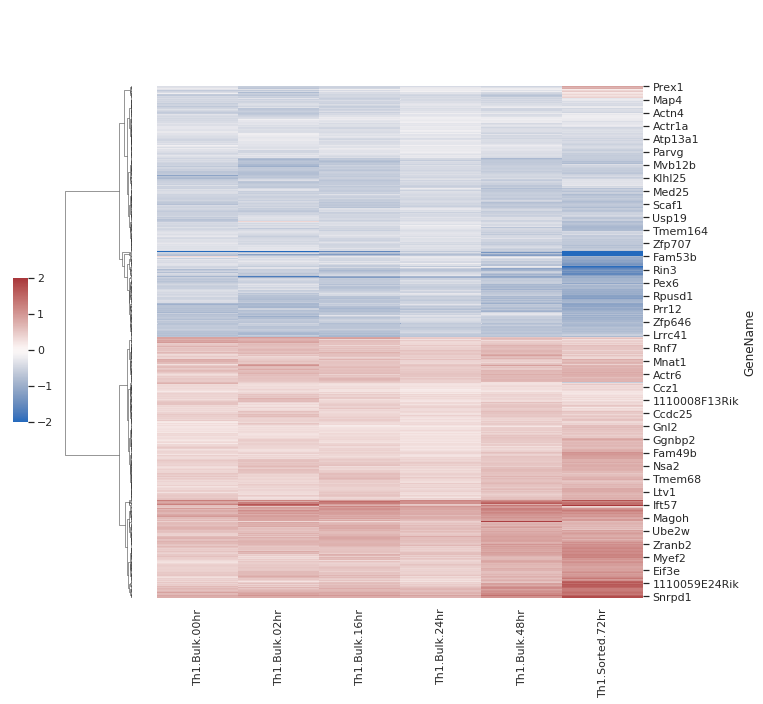

In [68]:
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1)

Th1_inner = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/logFC/Th1.inner.logFC.txt', sep='\t')
Th1_inner = Th1_inner.set_index('GeneName')
g = sns.clustermap(Th1_inner, dendrogram_ratio=0.125, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', cmap='vlag', vmin=-2, vmax=2, col_cluster=False)
#g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 16)


In [10]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

Th1 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/logFC/Th1.logFC.txt', sep='\t')
Th1 = Th1.fillna(0)
# # Th1.sort_values(by=['Th1.Bulk.00hr', 'Th1.Bulk.02hr', 'Th1.Bulk.16hr',
# #        'Th1.Bulk.24hr', 'Th1.Bulk.48hr', 'Th1.Sorted.72hr'],ascending=False)

Th1 = Th1.set_index('GeneName')
Th1 = Th1[np.count_nonzero(Th1.values, axis=1) > len(Th1.columns)-4]
Th1 = Th1[np.abs(Th1.values)>1]
Th1 = Th1.drop_duplicates()
Th1.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/logFC/Th1_filtered.logFC.txt', sep='\t')

numeric_cols = Th1.select_dtypes(include=[np.number]).columns
Th1_zscore = Th1[numeric_cols].apply(zscore)


conditions = [
    (np.abs(Th1['Th1.Bulk.00hr'])>1),
    (np.abs(Th1['Th1.Bulk.00hr'])<=1)]
values=['low.sigDE','sigDE']
Th1['00hr_annot'] = np.select(conditions, values)
Th1 = Th1.drop(columns='Th1.Bulk.00hr')
#Th1 = Th1.reset_index()
#Th1[Th1['GeneName']=='Tbx21']
Th1

,Th1.Bulk.02hr,Th1.Bulk.16hr,Th1.Bulk.24hr,Th1.Bulk.48hr,Th1.Sorted.72hr,00hr_annot
GeneName,,,,,,
Ncf1,-0.979884,0.704518,0.515909,2.028331,2.090462,sigDE
Tbc1d4,-0.244380,0.000000,-0.403122,-0.233806,-2.538354,sigDE
Egln3,0.000000,1.096716,0.986624,3.829330,5.479520,sigDE
Itga3,-0.665648,-0.653686,-0.450890,-1.667190,-2.665378,sigDE
Id2,0.000000,0.348862,0.000000,1.055190,-0.584319,sigDE
Irf8,0.000000,1.111556,1.093820,4.010359,3.617959,sigDE
Ighm,-0.578245,-0.612394,-0.630003,-0.234819,-1.955152,sigDE
Ubash3a,-0.452637,-0.375554,-0.245422,-0.195804,-1.074182,sigDE
Tiparp,0.000000,0.000000,0.328448,0.000000,1.803573,sigDE


In [4]:
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch

d = sch.distance.pdist(Th1)
L = sch.linkage(d, method='ward')
# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L, 0.2*d.max(), 'distance')

# clusters indicices correspond to incides of original df
for i,cluster in enumerate(clusters):
    print(Th1.index[i], cluster)

Ncf1 21
Tbc1d4 3
Egln3 16
Itga3 5
Id2 22
Irf8 15
Ighm 6
Ubash3a 6
Tiparp 20
Ms4a4b 4
Il6ra 6
Ifi203 4
Mndal 4
Rgs1 17
Sema4c 6
Themis 21
Itm2a 6
Gata3 6
Galm 4
Smim3 21
Satb1 20
Alcam 22
Ubash3b 6
Bcl2l11 5
Klf3 6
Socs2 19
Unc93b1 6
Capg 6
Ankrd50 2
Rnf19b 21
Tns1 1
Egr3 6
Cd74 9
Dgkz 6
Ptprj 20
Lsp1 4
Atp2a3 6
Cmtm7 6
Picalm 17
Ttyh3 5
Arsb 8
Tnfrsf1b 1
Slamf1 20
Hdac5 2
Ncoa2 6
Plek 1
Jade2 6
Klhl6 17
Myo1e 6
Wdr6 2
Nfkbiz 4
Zfpm1 6
Ptpn2 17
Arhgef3 6
Cd96 4
Sema7a 16
Rin3 2
Nt5e 3
Ifi47 22
Tnfsf11 4
Zfp862-ps 5
Lrrc8d 6
Mphosph6 17
Rxra 6
Zfp362 5
Gimap4 22
Hyls1 18
Foxn3 2
Peli1 22
Myh9 2
Endod1 3
4930417O13Rik 22
Ltb 22
Malt1 22
Lad1 3
Cd3e 6
Mmd 4
Lif 21
Kcnn4 6
Zfp395 5
Tbx21 14
Tmem19 6
Slamf6 3
Hdac7 5
Hsf2 17
Dapl1 3
Itga4 4
Mfge8 5
Ms4a6c 6
Tnfrsf13c 9
Stx11 6
Kdm2b 6
Ccl3 1
Fam102b 6
Synpo 6
Slc25a45 6
Pacsin1 6
Magohb 17
Sntb1 3
Nfkbia 4
Adprm 17
Cxcr3 6
Xkrx 6
Gm13546 17
Trpv2 5
Ggta1 22
Extl3 2
Fes 21
Fam107b 22
Ccr7 6
Hvcn1 5
Serpinb9 22
Pik3cg 6
Marcksl1 5
Mapk6 22
Inp

In [25]:
Th1_index = Th1.reset_index()
Th1_72hr = Th1_index[['GeneName','Th1.Sorted.72hr']]
Th1_72hr.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th1.Sorted.72hr.filtered.txt', sep='\t', index=False)


In [1]:
!wc -l /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th1.Sorted.72hr.filtered.txt

917 /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th1.Sorted.72hr.filtered.txt


### hierarchical clustering without 00hr annotation

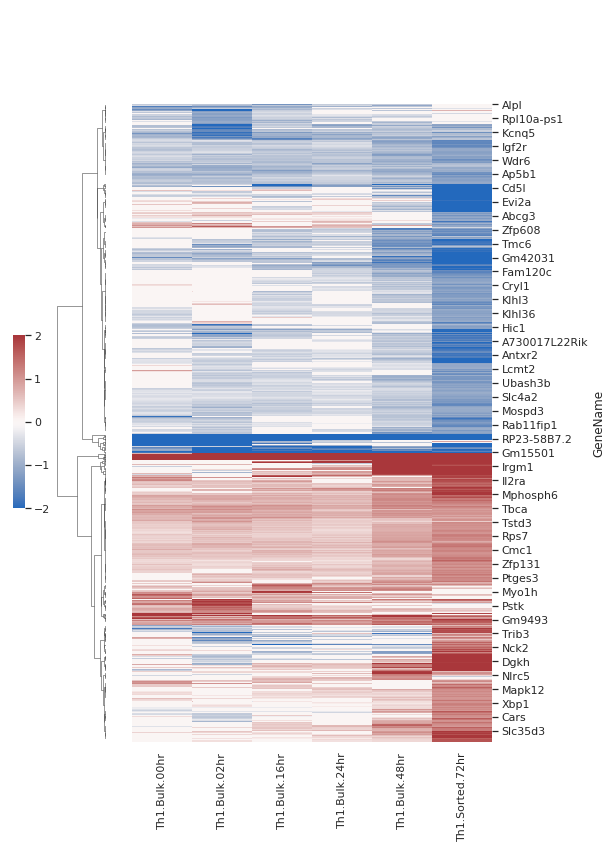

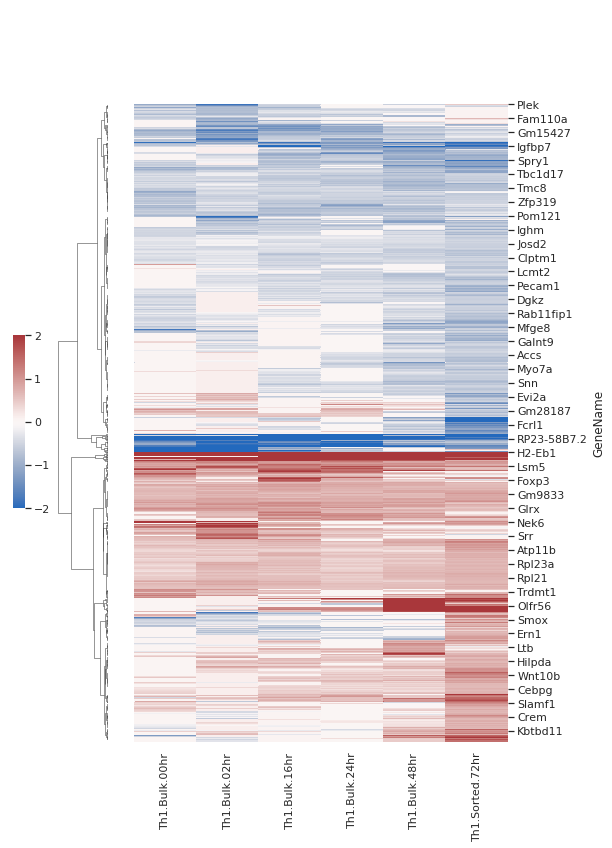

In [5]:
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1)

g1 = sns.clustermap(Th1, figsize = (8,12), dendrogram_ratio=0.125, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', cmap='vlag', col_cluster=False, vmin=-2, vmax=2)
g2 = sns.clustermap(Th1_zscore, figsize = (8,12), dendrogram_ratio=0.125, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', cmap='vlag', col_cluster=False, vmin=-2, vmax=2)



### hierarchical clustering heatmaps for Th1 when genes are filtered based on low expression values and less variations across timepoints - using the raw logFC values

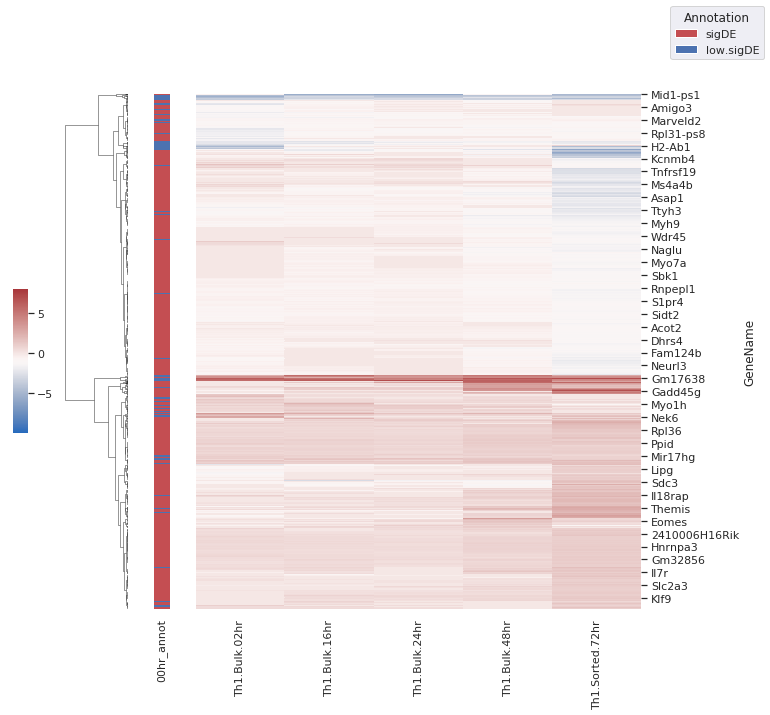

In [11]:
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1)

annot = Th1.pop("00hr_annot")
lut = dict(zip(annot.unique(), "rbg"))
row_colors = annot.map(lut)
g = sns.clustermap(Th1, dendrogram_ratio=0.125, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', cmap='vlag', col_cluster=False, row_colors=row_colors)

handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Annotation',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')


['b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'y',
 'y',
 'c',
 'g',
 'm',
 'b',
 'b',
 'y',
 'm',
 'm',
 'y',
 'y',
 'g',
 'b',
 'y',
 'b',
 'c',
 'k',
 'c',
 'b',
 'b',
 'g',
 'k',
 'g',
 'c',
 'y',
 'b',
 'g',
 'y',
 'c',
 'k',
 'y',
 'k',
 'k',
 'b',
 'c',
 'b',
 'y',
 'c',
 'b',
 'c',
 'y',
 'b',
 'g',
 'c',
 'm',
 'r',
 'c',
 'k',
 'b',
 'g',
 'b',
 'b',
 'b',
 'y',
 'k',
 'k',
 'y',
 'b',
 'm',
 'b',
 'b',
 'r',
 'r',
 'g',
 'b',
 'b',
 'y',
 'm',
 'b',
 'r',
 'y',
 'b',
 'k',
 'm',
 'b',
 'c',
 'b',
 'r',
 'c',
 'b',
 'c',
 'm',
 'b',
 'm',
 'b',
 'k',
 'c',
 'b',
 'g',
 'b',
 'c',
 'g',
 'm',
 'b',
 'r',
 'c',
 'y',
 'k',
 'b',
 'r',
 'b',
 'm',
 'k',
 'm',
 'b',
 'm',
 'b',
 'c',
 'r',
 'c',
 'c',
 'y',
 'k',
 'm',
 'c',
 'c',
 'b',
 'b',
 'm',
 'y',
 'g',
 'k',
 'g',
 'b',
 'k',
 'y',
 'b',
 'k',
 'k',
 'k',
 'k',
 'y',
 'm',
 'y',
 'g',
 'r',
 'k',
 'm',
 'r',
 'g',
 'g',
 'g',
 'g',
 'c',
 'r',
 'm',
 'm',
 'm',
 'm',
 'm',
 'k',
 'g',
 'c',
 'r',
 'm',
 'k',
 'k',
 'k',
 'b',
 'k'

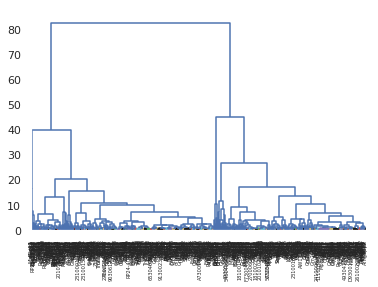

In [19]:
import scipy

den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_row.linkage,
                                         labels = Th1.index,
                                         color_threshold=0.60)  
from collections import defaultdict

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = {}
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

clusters = get_cluster_classes(den)

cluster = []
for i in Th1.index:
    included=False
    for j in clusters.keys():
        if i in clusters[j]:
            cluster.append(j)
            included=True
    if not included:
        cluster.append(None)

cluster

### hierarchical clustering heatmaps for Th1 when genes are filtered based on low expression values and less variations across timepoints - using the z scores of logFC values

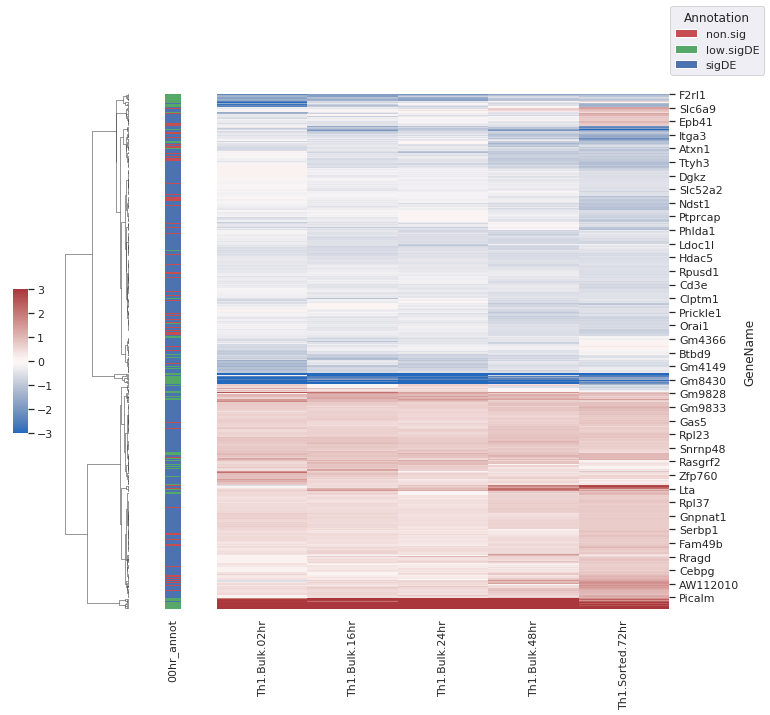

In [18]:
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1)

annot = Th1.pop("00hr_annot")
lut = dict(zip(annot.unique(), "rbg"))
row_colors = annot.map(lut)
g = sns.clustermap(Th1, z_score=1, dendrogram_ratio=0.125, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', cmap='vlag', vmin=-3, vmax=3, col_cluster=False, row_colors=row_colors)
#g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 16)

handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Annotation',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')


# Repeat the same thing for Th2

In [21]:
import numpy as np
import pandas as pd

Th2 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/logFC/Th2.logFC.txt', sep='\t')
Th2 = Th2.fillna(0)

Th2 = Th2.set_index('GeneName')
Th2 = Th2[np.count_nonzero(Th2.values, axis=1) > len(Th2.columns)-4]
Th2 = Th2[np.abs(Th2.values)>1]

Th2 = Th2.drop_duplicates()

Th2.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/logFC/Th2_filtered.logFC.txt', sep='\t')

# conditions = [
#     (Th2['Th2.Bulk.00hr']==0),
#     (np.abs(Th2['Th2.Bulk.00hr'])>1),
#     (np.abs(Th2['Th2.Bulk.00hr'])<=1)]
# values=['non.sig','low.sigDE','sigDE']
# Th2['00hr_annot'] = np.select(conditions, values)
# Th2 = Th2.drop(columns='Th2.Bulk.00hr')
Th2

,Th2.Bulk.00hr,Th2.Bulk.02hr,Th2.Bulk.16hr,Th2.Bulk.24hr,Th2.Bulk.48hr,Th2.Sorted.72hr
GeneName,,,,,,
Satb1,0.000000,0.548335,1.568556,1.839504,1.125396,1.522841
Gata3,0.000000,1.366626,2.799344,3.063910,2.982339,2.277514
Rbpj,0.202313,0.817976,0.886413,1.605315,1.784551,1.415515
Id2,1.095267,0.000000,2.483835,2.724626,4.024215,3.600748
Malt1,0.348129,0.000000,1.197686,1.385071,1.639873,2.557459
Gm19585,0.643041,0.731399,2.381189,3.219241,2.105501,1.207880
Vsir,-0.606284,-0.601815,-1.726627,-2.202208,-1.867222,-1.533856
Irf8,-0.681263,1.784094,-1.716109,-2.439051,-1.118474,0.530653
Rnf19b,0.000000,1.073404,1.347066,1.575214,2.212661,2.817096


In [27]:
Th2_index = Th2.reset_index()
Th2_72hr = Th2_index[['GeneName','Th2.Sorted.72hr']]
Th2_72hr.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th2.Sorted.72hr.filtered.txt', sep='\t', index=False)


/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/seaborn/matrix.py:626: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


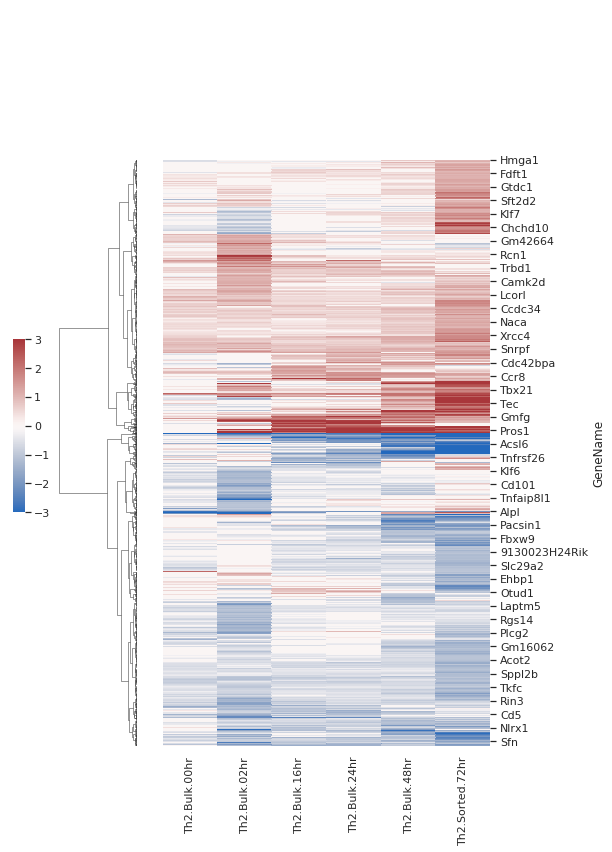

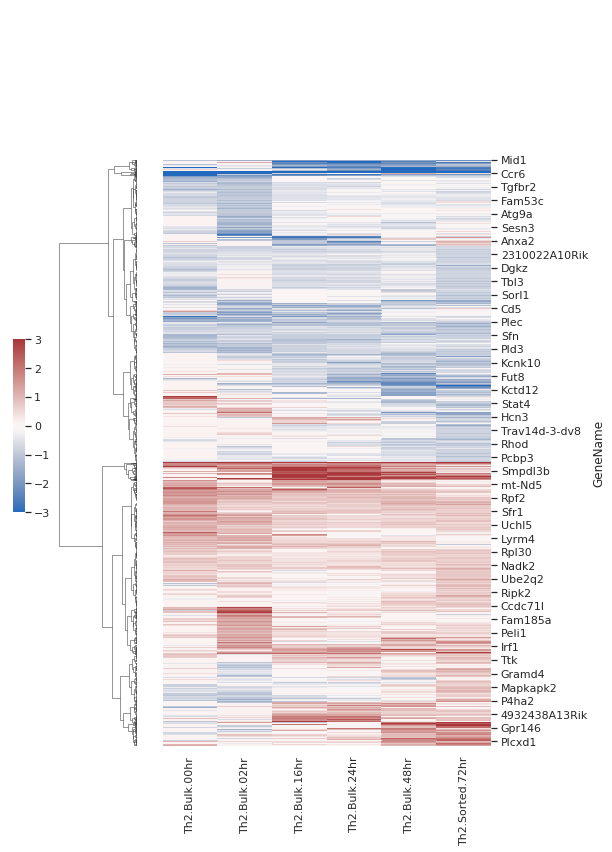

In [19]:
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1)

g1 = sns.clustermap(Th2, figsize = (8,12), cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', cmap='vlag', vmin=-3, vmax=3, col_cluster=False)
g2 = sns.clustermap(Th2, figsize = (8,12), z_score=1, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', cmap='vlag', vmin=-3, vmax=3, col_cluster=False)



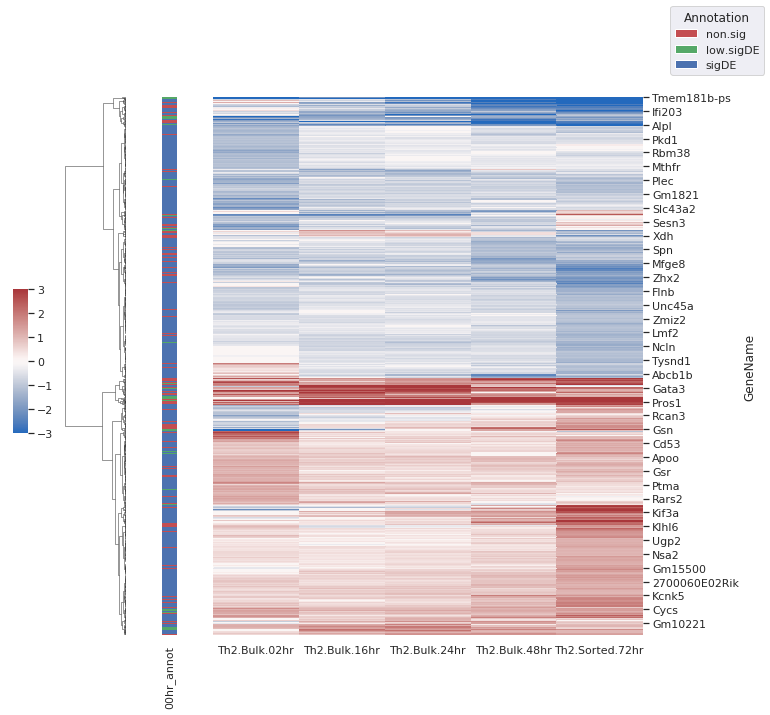

In [26]:
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1)

annot = Th2.pop("00hr_annot")
lut = dict(zip(annot.unique(), "rbg"))
row_colors = annot.map(lut)
g = sns.clustermap(Th2, dendrogram_ratio=0.125, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', cmap='vlag', vmin=-3, vmax=3, col_cluster=False, row_colors=row_colors)

handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Annotation',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')


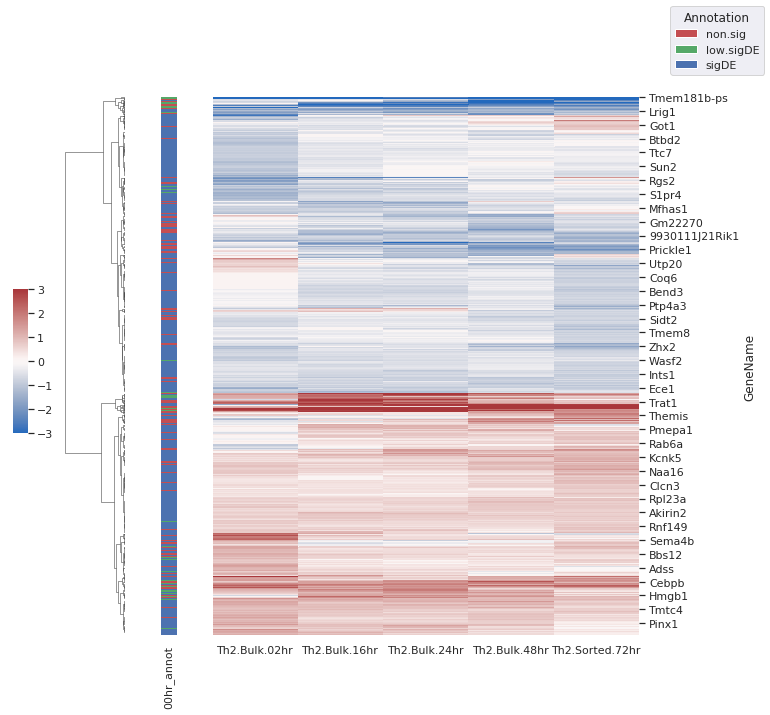

In [32]:
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1)

annot = Th2.pop("00hr_annot")
lut = dict(zip(annot.unique(), "rbg"))
row_colors = annot.map(lut)
g = sns.clustermap(Th2, z_score=1, dendrogram_ratio=0.125, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', cmap='vlag', vmin=-3, vmax=3, col_cluster=False, row_colors=row_colors)
#g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 16)

handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Annotation',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
